In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/medium-articles-dataset-2020-edition/Cleaned_Medium_Data.csv")

In [3]:
df.head()

,Title,SubTitle,Link,Claps,Reading_Time,Responses,Publication,Title_clean,SubTitle_clean,Title_wc,SubTitle_wc
0,The Reported Mortality Rate of Coronavirus Is ...,Why the “mortality rate” of the Wuhan coronavi...,https://medium.com/swlh/the-reported-mortality...,1100,13,18,The Startup,The Reported Mortality Rate of Coronavirus Is ...,Why the “mortality rate” of the Wuhan coronavi...,9,20
1,Dashboards in Python: 3 Advanced Examples for ...,Code a Python…,https://medium.com/swlh/dashboards-in-python-3...,726,14,3,The Startup,Dashboards in Python: 3 Advanced Examples for ...,Code a Python...,12,3
2,How Can We Best Switch in Python?,Are you tired of writing too many if…elif…else...,https://medium.com/swlh/how-can-we-best-switch...,500,6,7,The Startup,How Can We Best Switch in Python?,Are you tired of writing too many if...elif......,7,11
3,Maternity leave shouldn’t set women back,NaN,https://medium.com/swlh/maternity-leave-should...,460,9,1,The Startup,Maternity leave shouldn’t set women back,NaN,6,0
4,Python NLP Tutorial: Information Extraction an...,NaN,https://medium.com/swlh/python-nlp-tutorial-in...,163,7,0,The Startup,Python NLP Tutorial: Information Extraction an...,NaN,8,0


In [4]:
df.dtypes

Title             object
SubTitle          object
Link              object
Claps              int64
Reading_Time       int64
Responses          int64
Publication       object
Title_clean       object
SubTitle_clean    object
Title_wc           int64
SubTitle_wc        int64
dtype: object

In [5]:
# clean the columns name
def clean(name):
    return name.lower().strip().replace(" ", "_")
df.rename(columns = clean, inplace = True)
df.head()

,title,subtitle,link,claps,reading_time,responses,publication,title_clean,subtitle_clean,title_wc,subtitle_wc
0,The Reported Mortality Rate of Coronavirus Is ...,Why the “mortality rate” of the Wuhan coronavi...,https://medium.com/swlh/the-reported-mortality...,1100,13,18,The Startup,The Reported Mortality Rate of Coronavirus Is ...,Why the “mortality rate” of the Wuhan coronavi...,9,20
1,Dashboards in Python: 3 Advanced Examples for ...,Code a Python…,https://medium.com/swlh/dashboards-in-python-3...,726,14,3,The Startup,Dashboards in Python: 3 Advanced Examples for ...,Code a Python...,12,3
2,How Can We Best Switch in Python?,Are you tired of writing too many if…elif…else...,https://medium.com/swlh/how-can-we-best-switch...,500,6,7,The Startup,How Can We Best Switch in Python?,Are you tired of writing too many if...elif......,7,11
3,Maternity leave shouldn’t set women back,NaN,https://medium.com/swlh/maternity-leave-should...,460,9,1,The Startup,Maternity leave shouldn’t set women back,NaN,6,0
4,Python NLP Tutorial: Information Extraction an...,NaN,https://medium.com/swlh/python-nlp-tutorial-in...,163,7,0,The Startup,Python NLP Tutorial: Information Extraction an...,NaN,8,0


In [6]:
df.isna().sum()

title                6
subtitle          2154
link                 0
claps                0
reading_time         0
responses            0
publication          0
title_clean          6
subtitle_clean    2154
title_wc             0
subtitle_wc          0
dtype: int64

<div>
    <p style="color: #056676; text-align: justify; font-weight:bold; font-size: 20px; font-family:Montserrat;">
        An article on the <i>medium.com </i> may have the descriptive subtitle or may not. It is totally optional content which is depend on the author wheather he/she insert or not hence there is no any benifit of replacing the NA Values in the  subtitle column. Hence we will keep it as it is and move forward to futhur analysis    </p>
    </div>

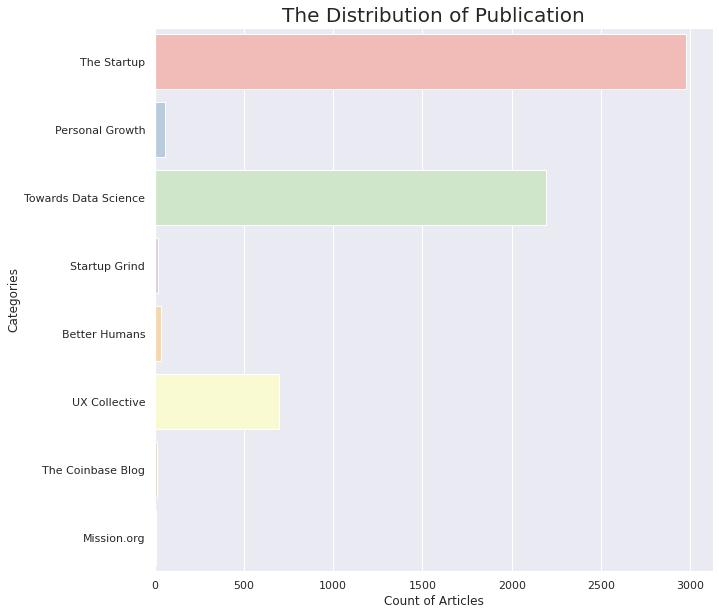

In [7]:
sns.set()
fig, ax = plt.subplots(figsize =(10,10))
ax = sns.countplot(y = df.publication, palette="Pastel1")
ax.set_ylabel("Categories")
ax.set_xlabel("Count of Articles")
plt.title("The Distribution of Publication", fontsize = 20)
plt.show()

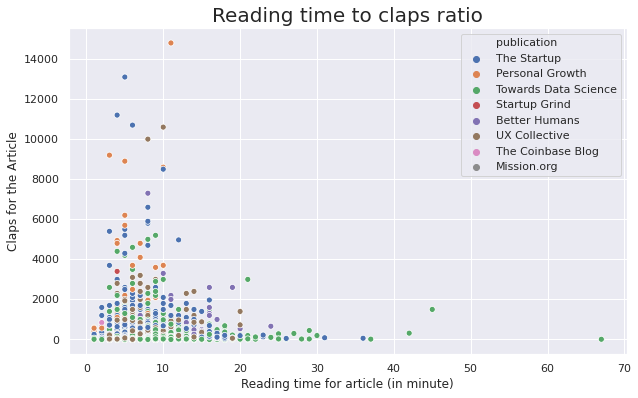

In [8]:
sns.set()
fig, ax = plt.subplots(figsize =(10,6))
ax = sns.scatterplot (x = "reading_time", y = "claps", data = df,hue = "publication")
ax.set_xlabel("Reading time for article (in minute)")
ax.set_ylabel("Claps for the Article")
plt.title("Reading time to claps ratio", fontsize = 20)
plt.show()

<div>
    <p style="color: #382933; text-align: justify; font-weight:bold; font-size: 16px;  letter-spacing: 1px;">
        As we exprected, the articles on <i style = "color: #ea5455">medium.com </i> have the good amount of claps (appreciation) if they are of the quite good  and average length. The article should not be too long. Hence, if you are looking to start blogging over there then you must keep eye on it.</p>
    </div>

In [9]:
df.groupby("publication")["claps"].sum().reset_index().sort_values (by = "claps", ascending = False)
# Startup publication has the highest no. of claps and  it it 

,publication,claps
5,The Startup,654298
6,Towards Data Science,331617
7,UX Collective,208692
2,Personal Growth,137697
0,Better Humans,39249
4,The Coinbase Blog,6159
3,Startup Grind,4381
1,Mission.org,708


<div>
       <center style = "font-size: 25px;"> Most Loved Topic with the 654298 claps is  </center>
       <img src = "https://cdn-images-1.medium.com/max/814/1*pempph-OAqpRKG5v1-yisg@2x.png" height=400 width = 400 />
    </div>

<div>
    <p style="color: #3c2c3e; text-align: justify; font-weight:bold; font-size: 18px;">
        Below graph gives us conclusion that, from the list of the above mentioned publications the all topics has the articles which requires the average reading time of 4 - 8 mins. But the topic <i style = "color: #ea5455"> Better Humans </i> (which is a  kind of self help topic) requires the more time. </p>
    </div>

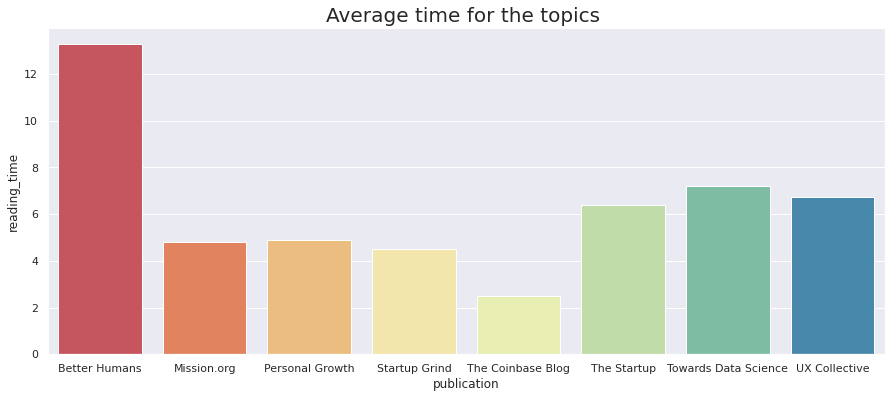

In [10]:
temp = df.groupby("publication")["reading_time"].mean().reset_index()
sns.set()
plt.figure(figsize = (15,6))
plt.title("Average time for the topics ", size = 20)
sns.barplot(x="publication", y  = "reading_time", data = temp, palette="Spectral")
plt.show()

<h1>----------------------------------------------------------------------------------------------- </h1> 

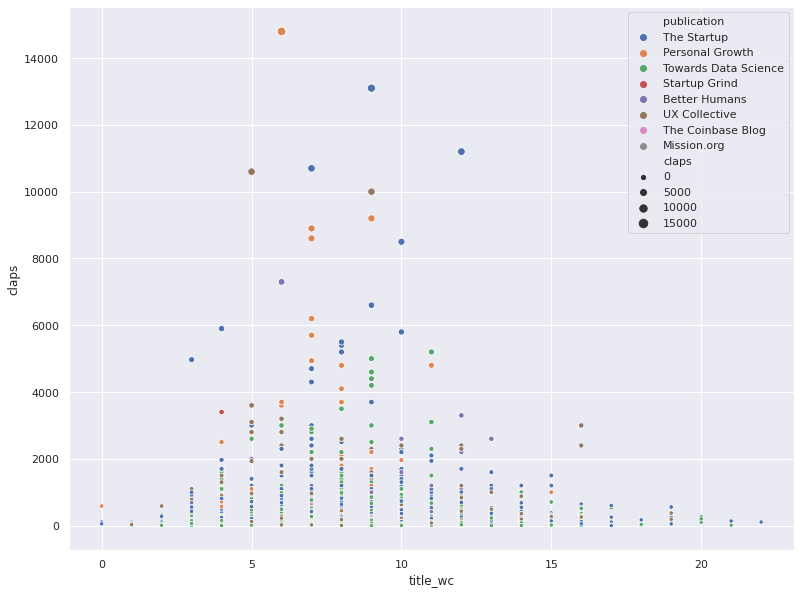

In [11]:
plt.figure(figsize = (13,10))
sns.scatterplot(y="claps", x="title_wc", data = df, hue= "publication", size = "claps")
plt.show()

<div>
    <p style="color: #056676; text-align: justify; font-weight:bold; font-size: 25px; font-family:Montserrat;">
       The Above graph gives us the inference that the title should be minimilistic and descriptive. The average wordcount is 5 - 15 words  </p>
    </div>

 <h1>----------------------------------------------------------------------------------------------- </h1> 

<div>
    <p style="color: #423144; text-align: justify; font-size: 25px; font-family:Montserrat;">
Most important aspect of the any article is the interaction of the people. The people tends to react most to the articles which are <i style = " font-weight:bold; text-tranformation: uppercase;"> short and concise. </i> The concise Articles  also denote the akill of the writer. Hence  it is also a good inference for any blogger that is they are looking for blogging they must keep their articl concise and representative </p>
    </div>



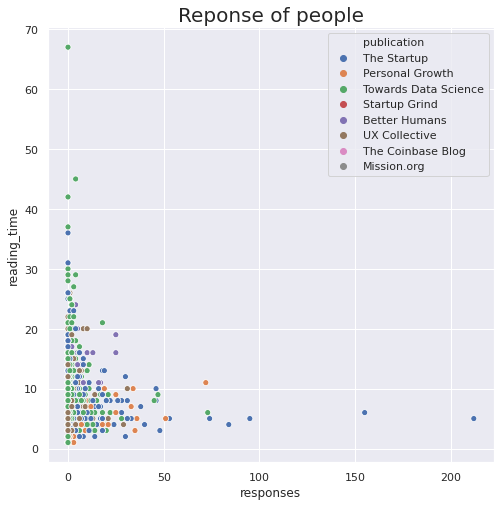

In [12]:
plt.figure(figsize = (8,8))
sns.scatterplot(y="reading_time", x="responses", data = df, hue= "publication")
plt.title("Reponse of people", size = 20)
plt.show()

<div>
    <p style="color: #423144; text-align: justify; font-size: 25px; font-family:Montserrat;">
For responses the people interested in  <i style = " font-weight:bold; text-tranformation: uppercase;"> The Startup. </i></p>
    </div>



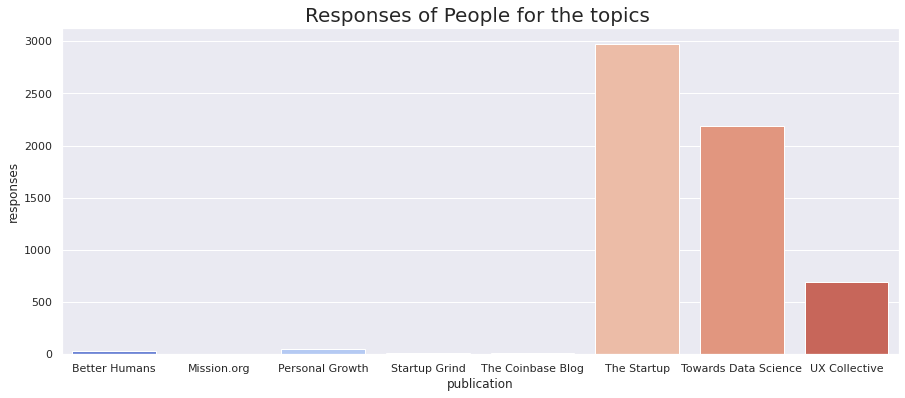

In [13]:
temp = df.groupby("publication")["responses"].count().reset_index()
sns.set()
plt.figure(figsize = (15,6))
plt.title("Responses of People for the topics ", size = 20)
sns.barplot(x="publication", y  = "responses", data = temp, palette="coolwarm")
plt.show()

 <div>
    <p style="color: #cf1b1b; text-align: justify; font-weight:bold; font-size: 25px; font-family:Montserrat;">
This is small try by myself for inferential analysis.<br> Give your feedback and suggestions are welcome.... 😇</p>  <br> <br>
            <center style = "color: #6f4a8e; font-weight:bold; font-size: 25px; font-family:Montserrat; font-size: 25px;">
                Upvote it if you find it useful  </center>


</div>


<img src ="https://i.pinimg.com/564x/f0/f4/18/f0f4186a05fd5a14fdd4cf434f442265.jpg" height = 200 width = 200/>
